In [20]:
import numpy as np 
import numpy.random as npr
import matplotlib.pyplot as plt 
import scipy.stats as stats 
from tqdm import tqdm
from scipy.integrate import quad
np.random.seed(6789)

## Notations 

Toutes les variables aléatoires sont définies sur un espace de probabilité $ (\Omega, \mathcal{F}, \mathbb{P}) $ et prennent leurs valeurs dans un espace mesurable $ \mathbb{X} $ qui est $ \mathbb{Z} $ ou $ \mathbb{R} ^d $. 

- $ X \sim p $ : $X $ admet une densité par rapport à la mesure de Lebesgue ou de comptage. 

- $ Y \sim q $

- $ \frac{ d \mathbb{P} _{(X,Y)}}{d \lambda} := \Gamma $

- $ U_n \sim V_n $ ssi $ \frac{U_n}{V_n} \to 1 $ quand $n \to + \infty $

## Plan 

- Introduction 

- Méthode d'échantillonnage par rejet couplé

## Introduction 

Si $(X_t)_t$ et $(Y_t)_t$ sont des chaînes de Markov, le temps de couplage est défini comme : $\text{inf} \{t \ge 0 : X_t = Y_t \}$. 

On propose une illustration à partir de [l'article](https://proceedings.mlr.press/v130/wang21d/wang21d.pdf) de O’Leary, Wang et Jacob. 

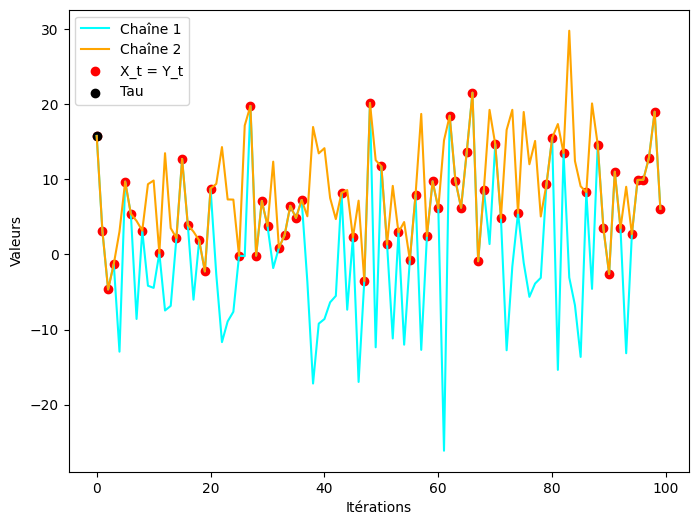

In [6]:
def algorithm2(values, length):
    def normal_mean(value, evaluate):
        """  Densité d'une loi normale de moyenne value et de variance 10, évaluée en evaluate      
        """
        return np.exp(-(evaluate - value)**2 / 20) / (np.sqrt(20 * np.pi))
    simulation = []

    for i in range(length):
        x2, U = npr.normal(values[0], 10), npr.uniform()
        rapport = normal_mean(values[1], x2) / normal_mean(values[0], x2)
        if U <= rapport: 
            y2 = x2
        else: 
            repeat = True 
            while repeat: 
                y3, V = npr.normal(values[1], 10), npr.uniform()
                rapport = normal_mean(values[0], y3) / normal_mean(values[1], y3)
                if rapport <= V: 
                    y2 = y3
                    repeat = False
        simulation.append([i, x2, y2])
    return np.array(simulation) 

simulation = algorithm2(np.array([0.25, 4]), 10**2)
plt.figure(figsize=(8,6))
plt.plot(simulation[:,0], simulation[:,1], label = "Chaîne 1", color = "cyan")
plt.plot(simulation[:,0], simulation[:,2], label = "Chaîne 2", color = 'orange')
plt.scatter(simulation[simulation[:,1] == simulation[:,2]][:,0], simulation[simulation[:,1] == simulation[:,2]][:,1], color='red', label="X_t = Y_t")
plt.scatter(simulation[simulation[:,1] == simulation[:,2]][0,0],simulation[simulation[:,1] == simulation[:,2]][0,1], color='black', label="Tau")
plt.plot()
plt.xlabel("Itérations")
plt.ylabel("Valeurs")
plt.legend()
plt.show()

## Méthode d'échantillonnage par rejet couplé

$\textbf{Definition 1}$ : Un couple de variables aléatoires $ (X, Y)$ défini sur le même espace de probabilité et prenant ses valeurs dans $ \mathcal{X} $ est un couplage diagonal de probabilités $p$ et $q$ si, et seulement si, c'est un couplage tel que : 

- $ \mathbb{P} (X \in A) = \displaystyle \int _{A} p(x) dx $ 

- $ \mathbb{P} (Y \in A) = \displaystyle \int _{A} q(x) dx $, $ \forall A \subset \mathcal{X}$ 

- $ \mathbb{P} (X = Y) > 0$

Avec cette définition, un couplage maximal est un couplage diagonal de masse maximale sur l'évènement $ \{ X = Y \}$. 


$\textbf{Definition 2}$ : Soient $( \hat{p}, \hat{q}) $ une paire de densités de probabilité. On dit que $( \hat{p}, \hat{q}) $ domine $ (p,q) $ ou on écrit $( \hat{p}, \hat{q}) \succeq ( \hat{p}, \hat{q}) $ ssi il existe $ 1 \le M(p, \hat{p}) < + \infty$ , $ 1 \le M(q, \hat{q}) < + \infty$ tel que $ \forall x \in \mathbb{R} ^d$ on ait : $ p(x) \le M(p, \hat{p}) \hat{p} (x) $ , $ q(x) \le M(q, \hat{q}) \hat{q} (x) $.

Attention ! Ce n'est pas parce que nous avons de tels $( \hat{p}, \hat{q}) \succeq ( \hat{p}, \hat{q}) $ que $ \hat{ \Gamma } \succeq \Gamma $. 


Supposons que nous disposons de tels $( \hat{p}, \hat{q}) \succeq ( \hat{p}, \hat{q}) $ et de  $\hat{ \Gamma } \succeq \Gamma $. Nous pouvons alors proposer l'allgorithme suivant :



In [7]:
def RejectionCoupling(GammaH, p, q, pH, qH, M):
    """  Rejection Coupling (Algorithm1)
    GammaH (H pour Hat) représentant le couplage définit plus haut 
    """

    AX, AY = 0, 0
    while AX == 0 & AY == 0: 
        X1, Y1 = GammaH.rvs()
        U = npr.uniform()
        if U < (p(X1)) / (quad(GammaH(X1, ), 0, np.inf)[0] * M(p, )):
            AX = 1
        if :
            AY = 1
        X2, Y2 = p.rvs(), q.rvs()
        return AX * X1 + (1-AX) * X2, AY * Y1 + (1-AY) * Y2

SyntaxError: invalid syntax (3994534591.py, line 12)

Exemple : 

$ X, Y \sim \mathcal{U} ([0,3] \times [0,2]) $ et $ W, Z \sim \mathcal{U} ([0,1] ^2) $ où $X, Y, Z, W $ sont i.i.d. 

## Application 1 : Liaison des queues des distributions gaussiennes

Soient $X \sim \mathcal{N}(0,1), Y \sim \mathcal{N}(0,1)$.

Introduisons $X_{\mu} = X | X > \mu$ de densité par rapport à la mesure de lebesgue $ p_{\mu}$ et $Y_{\eta} = Y | Y > \eta$ de densité par rapport à la mesure de lebesgue $ q_{\eta}$.

Lorsque $\mu , \eta $ deviennent grand, on ne peut plus utliser la méthode d'inversion pour simuler $p$ et $q$, nous devons voir recours à la méthode d'échantillonnage par rejet. 

On utilise une loi exponentielle translatée comme proposition : $\text{Exp} (x; m, \lambda) = \lambda e^{- \lambda (x-m)} \textbf{1} (x \ge m)$.

Sans pertes de généralités, on suppose que $ \eta > \mu $.

In [22]:
def translated_exp_dist(x, m, l):
    """  Exponentielle translatée 
    """
    if x >= m:
        return l * np.exp(- l * (x - m))
    else:
        return 0
    
def alpha(z):
    """  Fonction Alpha définie pour la fonction 
        exponentielle translatée
    """
    return (z + np.sqrt(z**2 + 4) / 2)

def inverse_c(x, mu, eta):
    """  Inverse de l'exp translatée afin de simuler numériquement 
        c(x) % min(p_hat, q_hat) 
        On a supposé que eta > mu.
    """
    alpha_eta = alpha(eta)
    alpha_mu = alpha(mu)
    gamma = (np.log(alpha_eta) - np.log(alpha_mu) + eta * alpha_eta - mu * alpha_mu) / (alpha_eta - alpha_mu)
    inverse_1 = mu - np.log(np.exp(-alpha_mu * (eta - mu) - x * np.exp(-alpha_mu * (eta - mu) - np.exp(-alpha_mu * (gamma - mu))))) / alpha_mu
    inverse_2 = gamma - np.log(1 - x) / alpha_eta
    
    return None

def coupling_gaussian_distributions(mu, eta):
    """  Cas d'application 1 du papier
    On a supposé que eta > mu.
    """
    if eta <= mu: 
        print("Dans le papier nous supposons que eta > mu")
        return None
    else: 
        U = npr.uniform()  #Draw u ∼ U(0, 1)
        def p_hat(x):
            return translated_exp_dist(x, mu, alpha(mu))
        def q_hat(x):
            return translated_exp_dist(x, eta, alpha(eta))
        def min_p_q_hat(x):
            return min(p_hat(x), q_hat(x))
        integral, _ = quad(min_p_q_hat, 0, np.inf)

        if U <= integral:  #If u ≤ \int(min(ˆp(x), qˆ(x))) dx
            X = 
        else: 


        return None


0.0329013397230488

## Algorithme de Thorisson 

In [14]:
def ThorissonCoupling(p, q, C):
    X = p.rvs()
    U = np.random.uniform()
    if U < min(q.pdf(X) / p.pdf(X), C): 
        Y = X
    else: 
        A = 0
        while A!=1: 
            U = np.random.uniform()
            Z = q.rvs()
            if U > min(1, C * (p.pdf(Z) / q.pdf(Z))):
                A = 1
            Y = Z
    return X,Y

100%|██████████| 10000/10000 [00:11<00:00, 906.60it/s]
/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_1125/2494916415.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(couple[:,0], couple[:,1], label = f'C = {C}', cmap='viridis')
100%|██████████| 10000/10000 [00:10<00:00, 951.17it/s]


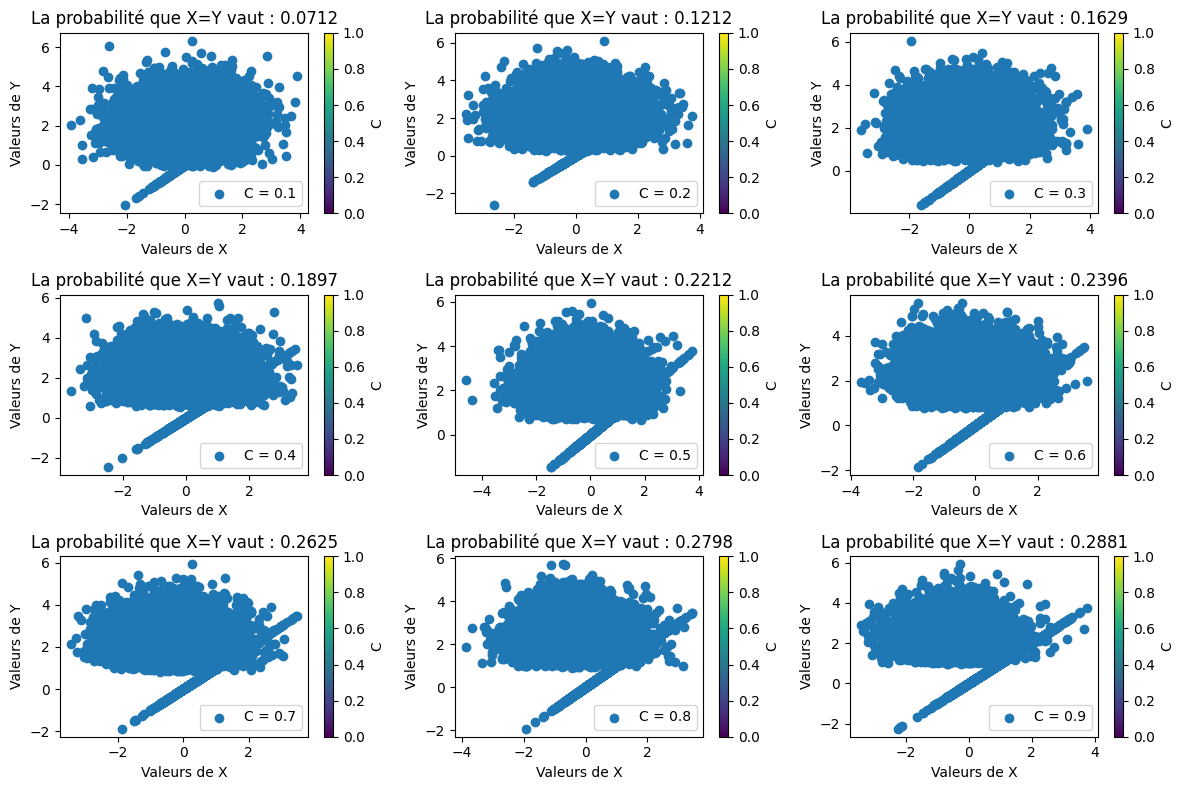

In [19]:
n = 10**4

def create_couple(C):
    c = []
    for _ in tqdm(range(n)):
        p = stats.norm(0, 1)  
        q = stats.norm(2, 1)  
        c.append(ThorissonCoupling(p, q, C))
    c = np.array(c)
    return c

plt.figure(figsize=(12, 8))
for i, C in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], start=1):
    couple = create_couple(C)
    plt.subplot(3, 3, i)
    plt.xlabel("Valeurs de X")
    plt.ylabel("Valeurs de Y")
    proba = np.sum(couple[:,0]==couple[:,1]) / len(couple)
    plt.title(f"La probabilité que X=Y vaut : {proba}")
    plt.scatter(couple[:,0], couple[:,1], label = f'C = {C}', cmap='viridis')
    plt.colorbar(label='C')
    plt.legend()
plt.tight_layout()
plt.show()


In [16]:
couple

array([[-1.00567598,  1.47680179],
       [-1.27343645,  1.79469998],
       [ 1.55012301,  2.65173062],
       ...,
       [ 1.24407054,  1.12611086],
       [ 1.67896373,  1.67896373],
       [-0.75063214,  2.8715161 ]])

Cette approche est valide pour construire une distribution jointe (couplage) pour $(X,Y)$ telle que $X \sim p$, $Y \sim q$ et $ \mathbb{P} (X=Y)$ avec une probabilité élevée, et elle est liée à l'échantillonnage par rejet.

L'algorithme de Thorisson Coupling utilise l'idée de l'échantillonnage par rejet pour construire une distribution jointe pour $(X,Y)$ car :

